In [1]:
# import cgr_sl_sr as sr
from cgr_sl_sr import *

start = -2
stop = 10
step = 0.05

### Contact Class

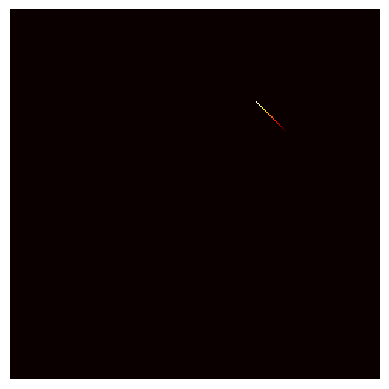

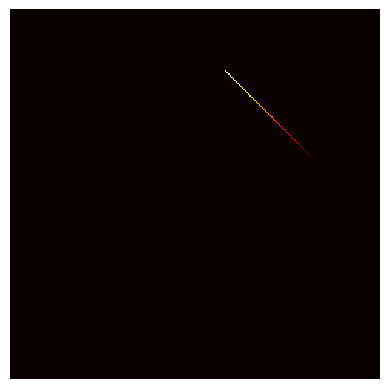

(4, 4)
(6, 6)


In [2]:
c =  Contact(1, 2, 5)
cc = Contact(0, 3, 5)

get_heat_map(c, start, stop, step)
get_heat_map(cc, start, stop, step)

points = Contact(4, 6, 0).get_boundary()
for p in points:
    print(p)

### Storage Class

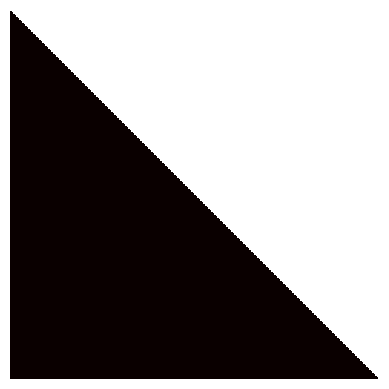

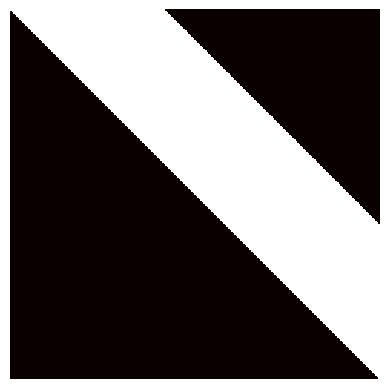

[[inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [3]:
s = Storage()
s5 = Storage(5)

get_heat_map(s, start, stop, step)
get_heat_map(s5, start, stop, step)

### Nevada Class

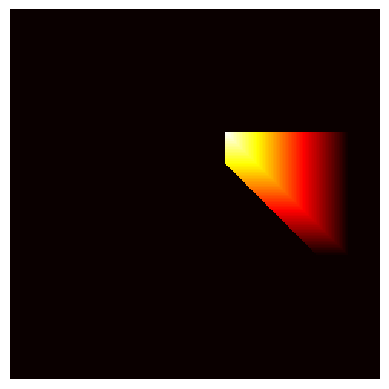

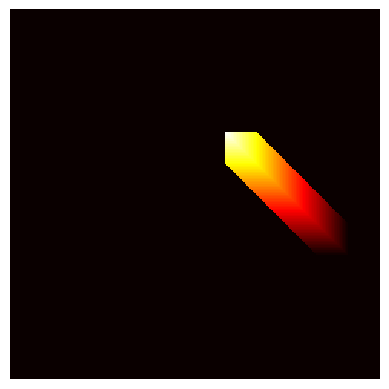

-------------
-------------
-------------
-------------
-------**----
-------***---
--------***--
---------**--
-------------
-------------
-------------
-------------
-------------

(6, 8)
(2, 6)
(5, 9)
(2, 5)
(6, 9)
(3, 5)


In [4]:
c = Contact.identity()
S = Storage()

# different representations of same Nevada (infinite storage)
n = Nevada(Contact(2, 6, 1), Contact(4, 8, 1), S)
nn =  Nevada(Contact(2, 6, 0), Contact(3, 7, 2), S)

get_heat_map(n, start, stop, step)
# get_heat_map(nn, start, stop, step)

n = Nevada(Contact(2, 6, 1), Contact(4, 8, 1), Storage(2))
nn = Nevada(Contact(2, 6, 0), Contact(3, 7, 2), Storage(2))

get_heat_map(n, start, stop, step)
# get_heat_map(nn, start, stop, step)
a = get_ascii_diagram(n, start, stop, 1)
print(a)

points = set(Nevada(Contact(2, 6, 0), Contact(3, 7, 2), Storage(2)).get_boundary())
for p in points:
    print(p)

### Product Class

A `product` is an sequence of `contact` and `storage` objects.

([0,10] : 5),S_(inf),S_(inf),([3,6] : 2),S_(inf),([1,8] : 1),([0,8] : 2) and ([0,10] : 5),S_(inf),([3,6] : 2),S_(inf),([1,7] : 3) are equal : True


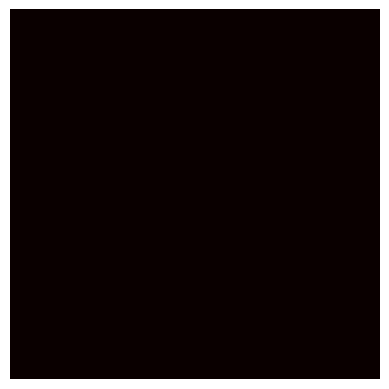

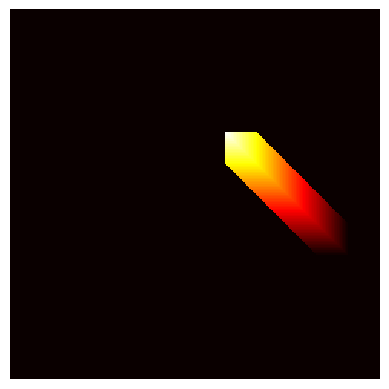

In [5]:
sequence = [
    Contact(0, 10, 5),
    Storage(),
    Storage(),
    Contact(3, 6, 2),
    Storage(),
    Contact(1, 8, 1),
    Contact(0, 8, 2)
]

p = Product(sequence)
e = p.evaluate()[0]

sequence_standard = [
    Contact(0, 10, 5),
    Storage(),
    Contact(3, 6, 2),
    Storage(),
    Contact(1, 7, 3)
]

p_std = Product(sequence_standard)
e_std = p_std.evaluate()[0]

print(f"{p} and {p_std} are equal : {e == e_std}")

get_heat_map(e, start, stop, step)

# n = Nevada(Contact(2, 6, 1), Contact(4, 8, 1), Storage(2))

p1 = Product([Contact(2, 6, 1)])
p2 = Product([Storage(2)])
p3 = Product([Contact(4, 8, 1)])

p = p1 * p2 * p3
e = p.evaluate()[0]

a = get_heat_map(e, start, stop, step)




### ContactSequence Class

A list of `Contact` objects.

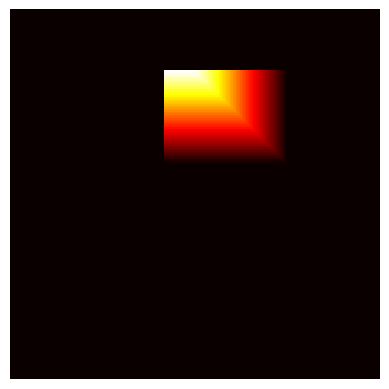

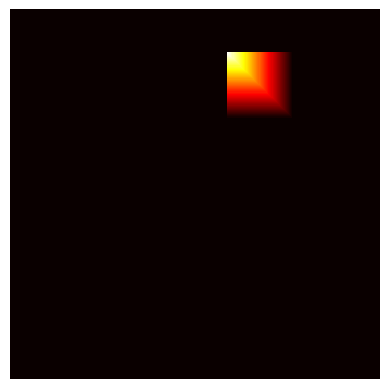

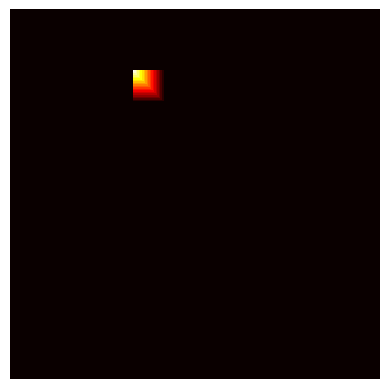

In [6]:
# Example 6.12

cs = ContactSequence([Contact(0, 3, 0), Contact(3, 4, 0), Contact(2, 7, 0)])

assert cs.get_tau() == 1
assert cs.get_nu() == 1

gamma = [1, 1] # TODO : check with Billy; different from paper
alpha = [1, 0]
for i in range(2):
    assert cs.get_gamma(i) == gamma[i]
    assert cs.get_alpha_bounds(i) == alpha[i]

n = cs.to_nevada()
get_heat_map(n, start, stop, step)

# Example 6.13

cs = ContactSequence([Contact(0, 3, 0), Contact(3, 7, 0), Contact(2, 4, 0), Contact(8, 11, 0)])
assert cs.get_tau() == 1
assert cs.get_nu() == 6

gamma = [1, 6, 11]
alpha = [1, 0, 5]
for i in range(3):
    assert cs.get_gamma(i) == gamma[i]
    assert cs.get_alpha_bounds(i) == alpha[i]

n = cs.to_nevada()
get_heat_map(n, start, stop + 5, step)

# Example 6.14

cs = ContactSequence([Contact(0, 1, 0), Contact(1, 3, 0), Contact(1, 3, 0), Contact(2, 3, 0)])
assert cs.get_tau() == 1
assert cs.get_nu() == 2
gamma = [1, 1, 2]
alpha = [1, 0, 0]
for i in range(3):
    assert cs.get_gamma(i) == gamma[i]
    assert cs.get_alpha_bounds(i) == alpha[i]

n = cs.to_nevada()
a = get_heat_map(n, start, stop, step)

### Simulations

([5696.489,23131.043] : 0),([49698.037,67132.445] : 0)
([-inf,23131.043] : 0) S_(inf) ([5696.489,23131.043] : 0),([-inf,67132.445] : 0) S_(inf) ([49698.037,67132.445] : 0),([0.0,14973.421] : 0),([5696.489,23131.043] : 0) S_(inf) ([5696.489,inf] : 0),([49698.037,67132.445] : 0) S_(inf) ([49698.037,inf] : 0)


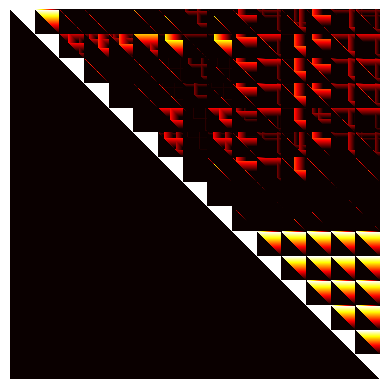

In [9]:
folder_base = "./outputs/experiments/semiring/"
filepath_ca = folder_base + "Contact Analysis.csv"
filepath_d = folder_base + "Distances.csv"

m = tvg_to_contact_matrix(filepath_ca, filepath_d)
print(m[0, 7])

m2 = m * m
print(m2[0, 7])

# m3 = m2 * m
# print(m3[0, 7])

start = -20
stop = 86400
step = 3600 / 2

array = (m2).get_array(start, stop, step)


# m4 = m3 * m

# m8 = m4 * m4